# Jarod Guign
## Research question/interests

Briefly describe your research question or interests here.

Does the release and continued popularity of triple A multiplayer fps titles effect the player numbers of CS:GO, or is its player base isolated from other video game communities?

## Milestone 3

### Analysis Pipeline

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

#### Load Data

In [2]:
chord1 = pd.read_csv('../data/raw/SteamCharts.csv', encoding='latin')
chord2 = pd.read_csv('../data/raw/Twitch_game_data.csv', encoding='latin')
chord3 = pd.read_csv('../data/raw/Twitch_global_data.csv', encoding='latin')
df_csgo = chord1[chord1['gamename'].str.startswith("Counter-Strike: Global Offensive")]
df_csgo

,gamename,year,month,avg,gain,peak,avg_peak_perc
0,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.9567%
1,Counter-Strike: Global Offensive,2021,January,743209.66,25405.91,1124553,66.0893%
2,Counter-Strike: Global Offensive,2020,December,717803.75,49049.17,1164396,61.646%
3,Counter-Strike: Global Offensive,2020,November,668754.58,55087.89,1037464,64.4605%
4,Counter-Strike: Global Offensive,2020,October,613666.69,6816.37,943876,65.0156%
...,...,...,...,...,...,...,...
99,Counter-Strike: Global Offensive,2012,November,14134.10,3394.62,50533,27.97%
100,Counter-Strike: Global Offensive,2012,October,10739.48,-5261.27,20850,51.5083%
101,Counter-Strike: Global Offensive,2012,September,16000.75,525.36,36057,44.3763%
102,Counter-Strike: Global Offensive,2012,August,15475.39,14542.81,52261,29.6117%


#### Clean Data

In [4]:
df_csgo['gain'].fillna(0, inplace=True)
df_csgo.pop('peak')
df_csgo.pop('avg_peak_perc')
df_csgo.pop('gamename')
df_csgo

#### Process Data

In [6]:
df_csgo = df_csgo.convert_dtypes()
#df_csgo['avg_peak_perc'] = pd.to_numeric(df_csgo['avg_peak_perc'].str.strip('%')).div(100)
# df_csgo['month'] = df_csgo['month'].replace(['February ', 'January ', 'December ', 'November ', 'October ', 'September ', 'August ', 'July ', 'June ', 'May ', 'April ', 'March '], ['2', '1', '12', '11', '10', '9', '8', '7', '6', '5', '4', '3'])
# df_csgo['month'] = df_csgo['month'].astype('int64')
df_csgo['day'] = '1'
df_csgo['datetime'] = pd.to_datetime(df_csgo['year'].astype(str)  + df_csgo['month'] + df_csgo['day'], format='%Y%B%d')
df_csgo

,gamename,year,month,avg,gain,day,datetime
0,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1,2021-02-01
1,Counter-Strike: Global Offensive,2021,January,743209.66,25405.91,1,2021-01-01
2,Counter-Strike: Global Offensive,2020,December,717803.75,49049.17,1,2020-12-01
3,Counter-Strike: Global Offensive,2020,November,668754.58,55087.89,1,2020-11-01
4,Counter-Strike: Global Offensive,2020,October,613666.69,6816.37,1,2020-10-01
...,...,...,...,...,...,...,...
99,Counter-Strike: Global Offensive,2012,November,14134.1,3394.62,1,2012-11-01
100,Counter-Strike: Global Offensive,2012,October,10739.48,-5261.27,1,2012-10-01
101,Counter-Strike: Global Offensive,2012,September,16000.75,525.36,1,2012-09-01
102,Counter-Strike: Global Offensive,2012,August,15475.39,14542.81,1,2012-08-01


In [7]:
df_csgo.pop('year')
df_csgo.pop('month')
df_csgo.pop('day')
df = df_csgo.pop('datetime')
df_csgo.insert(1, 'date', df)
df_csgo_sorted = df_csgo.sort_values('date')
df_csgo_sorted

,gamename,date,avg,gain
103,Counter-Strike: Global Offensive,2012-07-01,932.57,0.0
102,Counter-Strike: Global Offensive,2012-08-01,15475.39,14542.81
101,Counter-Strike: Global Offensive,2012-09-01,16000.75,525.36
100,Counter-Strike: Global Offensive,2012-10-01,10739.48,-5261.27
99,Counter-Strike: Global Offensive,2012-11-01,14134.1,3394.62
...,...,...,...,...
4,Counter-Strike: Global Offensive,2020-10-01,613666.69,6816.37
3,Counter-Strike: Global Offensive,2020-11-01,668754.58,55087.89
2,Counter-Strike: Global Offensive,2020-12-01,717803.75,49049.17
1,Counter-Strike: Global Offensive,2021-01-01,743209.66,25405.91


In [8]:
df_csgo_sorted['rolling_gain'] = df_csgo_sorted['gain'].rolling(7, center=True).mean()
df_csgo_sorted

,gamename,date,avg,gain,rolling_gain
103,Counter-Strike: Global Offensive,2012-07-01,932.57,0.0,NaN
102,Counter-Strike: Global Offensive,2012-08-01,15475.39,14542.81,NaN
101,Counter-Strike: Global Offensive,2012-09-01,16000.75,525.36,NaN
100,Counter-Strike: Global Offensive,2012-10-01,10739.48,-5261.27,2175.948571
99,Counter-Strike: Global Offensive,2012-11-01,14134.1,3394.62,2348.592857
...,...,...,...,...,...
4,Counter-Strike: Global Offensive,2020-10-01,613666.69,6816.37,10223.171429
3,Counter-Strike: Global Offensive,2020-11-01,668754.58,55087.89,16444.632857
2,Counter-Strike: Global Offensive,2020-12-01,717803.75,49049.17,NaN
1,Counter-Strike: Global Offensive,2021-01-01,743209.66,25405.91,NaN


In [9]:
df_csgo_sorted.fillna(0, inplace=True)
df_csgo_sorted

,gamename,date,avg,gain,rolling_gain
103,Counter-Strike: Global Offensive,2012-07-01,932.57,0.0,0.000000
102,Counter-Strike: Global Offensive,2012-08-01,15475.39,14542.81,0.000000
101,Counter-Strike: Global Offensive,2012-09-01,16000.75,525.36,0.000000
100,Counter-Strike: Global Offensive,2012-10-01,10739.48,-5261.27,2175.948571
99,Counter-Strike: Global Offensive,2012-11-01,14134.1,3394.62,2348.592857
...,...,...,...,...,...
4,Counter-Strike: Global Offensive,2020-10-01,613666.69,6816.37,10223.171429
3,Counter-Strike: Global Offensive,2020-11-01,668754.58,55087.89,16444.632857
2,Counter-Strike: Global Offensive,2020-12-01,717803.75,49049.17,0.000000
1,Counter-Strike: Global Offensive,2021-01-01,743209.66,25405.91,0.000000


#### Wrangle Data

### Exploritory Data Analysis

#### Understanding your Variables

In [10]:
chord1.head()

,gamename,year,month,avg,gain,peak,avg_peak_perc
0,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.9567%
1,Counter-Strike: Global Offensive,2021,January,743209.66,25405.91,1124553,66.0893%
2,Counter-Strike: Global Offensive,2020,December,717803.75,49049.17,1164396,61.646%
3,Counter-Strike: Global Offensive,2020,November,668754.58,55087.89,1037464,64.4605%
4,Counter-Strike: Global Offensive,2020,October,613666.69,6816.37,943876,65.0156%


In [11]:
df_csgo_sorted

,gamename,date,avg,gain,rolling_gain
103,Counter-Strike: Global Offensive,2012-07-01,932.57,0.0,0.000000
102,Counter-Strike: Global Offensive,2012-08-01,15475.39,14542.81,0.000000
101,Counter-Strike: Global Offensive,2012-09-01,16000.75,525.36,0.000000
100,Counter-Strike: Global Offensive,2012-10-01,10739.48,-5261.27,2175.948571
99,Counter-Strike: Global Offensive,2012-11-01,14134.1,3394.62,2348.592857
...,...,...,...,...,...
4,Counter-Strike: Global Offensive,2020-10-01,613666.69,6816.37,10223.171429
3,Counter-Strike: Global Offensive,2020-11-01,668754.58,55087.89,16444.632857
2,Counter-Strike: Global Offensive,2020-12-01,717803.75,49049.17,0.000000
1,Counter-Strike: Global Offensive,2021-01-01,743209.66,25405.91,0.000000


In [12]:
print(df_csgo_sorted.shape)
print(chord1.shape)

(104, 5)
(83789, 7)


In [13]:
print(df_csgo_sorted.dtypes)

gamename                string
date            datetime64[ns]
avg                    Float64
gain                   Float64
rolling_gain           float64
dtype: object


In [14]:
df_csgo_sorted.columns

Index(['gamename', 'date', 'avg', 'gain', 'rolling_gain'], dtype='object')

In [15]:
print(df_csgo_sorted.nunique(axis=0))

gamename          1
date            104
avg             104
gain            104
rolling_gain     99
dtype: int64


In [16]:
print(chord1.nunique(axis=0))

gamename          1260
year                10
month               12
avg              53471
gain             37276
peak             12748
avg_peak_perc    71491
dtype: int64


In [17]:
df_csgo_sorted.describe()

,avg,gain,rolling_gain
count,104.000000,104.000000,104.000000
mean,308644.838846,7116.160288,6399.672665
std,201665.515075,33753.264758,12743.815329
min,932.570000,-97147.790000,-26978.520000
25%,132648.012500,-3280.282500,0.000000
50%,342028.480000,3779.315000,4533.662143
75%,389592.580000,17534.425000,11141.663929
max,857604.220000,186570.940000,63811.232857


In [18]:
chord1.describe()

,year,avg,gain,peak
count,83789.000000,8.378900e+04,82529.000000,8.378900e+04
mean,2017.338708,2.792017e+03,-10.245559,5.518877e+03
std,2.237587,2.648480e+04,3789.944005,5.015571e+04
min,2012.000000,0.000000e+00,-250248.990000,0.000000e+00
25%,2016.000000,5.325000e+01,-38.310000,1.380000e+02
50%,2018.000000,2.042700e+02,-1.630000,5.020000e+02
75%,2019.000000,7.716500e+02,22.320000,1.741000e+03
max,2021.000000,1.584887e+06,426446.120000,3.236027e+06


In [21]:
print(df_csgo.date.unique())
print(df_csgo.gamename.unique())
print(df_csgo_sorted.date.unique())
print(df_csgo_sorted.gamename.unique())

['2021-02-01T00:00:00.000000000' '2021-01-01T00:00:00.000000000'
 '2020-12-01T00:00:00.000000000' '2020-11-01T00:00:00.000000000'
 '2020-10-01T00:00:00.000000000' '2020-09-01T00:00:00.000000000'
 '2020-08-01T00:00:00.000000000' '2020-07-01T00:00:00.000000000'
 '2020-06-01T00:00:00.000000000' '2020-05-01T00:00:00.000000000'
 '2020-04-01T00:00:00.000000000' '2020-03-01T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-01-01T00:00:00.000000000'
 '2019-12-01T00:00:00.000000000' '2019-11-01T00:00:00.000000000'
 '2019-10-01T00:00:00.000000000' '2019-09-01T00:00:00.000000000'
 '2019-08-01T00:00:00.000000000' '2019-07-01T00:00:00.000000000'
 '2019-06-01T00:00:00.000000000' '2019-05-01T00:00:00.000000000'
 '2019-04-01T00:00:00.000000000' '2019-03-01T00:00:00.000000000'
 '2019-02-01T00:00:00.000000000' '2019-01-01T00:00:00.000000000'
 '2018-12-01T00:00:00.000000000' '2018-11-01T00:00:00.000000000'
 '2018-10-01T00:00:00.000000000' '2018-09-01T00:00:00.000000000'
 '2018-08-01T00:00:00.000

#### Visualization

<AxesSubplot:>

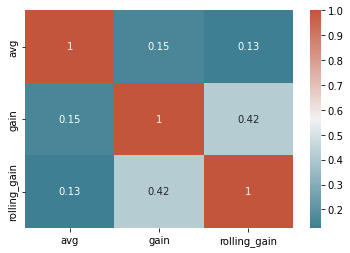

In [22]:
corr = df_csgo_sorted.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:xlabel='date', ylabel='rolling_gain'>

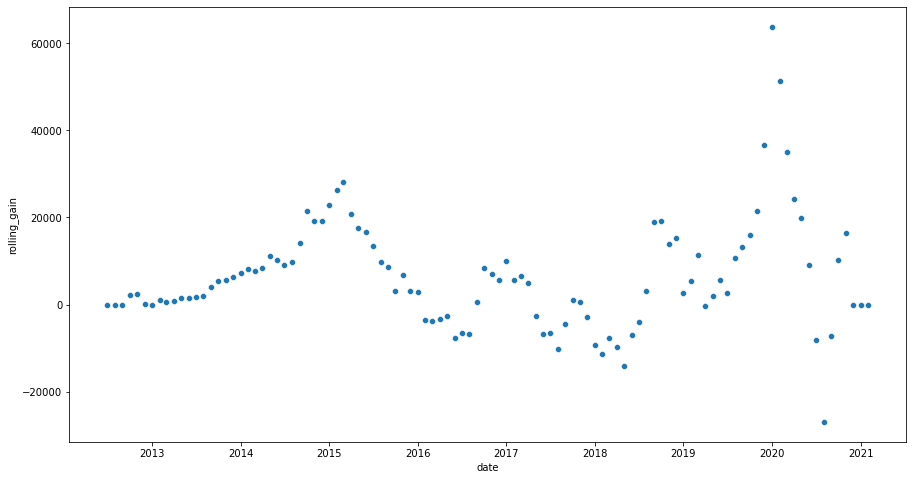

In [23]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.scatterplot(x = 'date', y='rolling_gain', data = df_csgo_sorted)

<AxesSubplot:xlabel='gameid', ylabel='peak'>

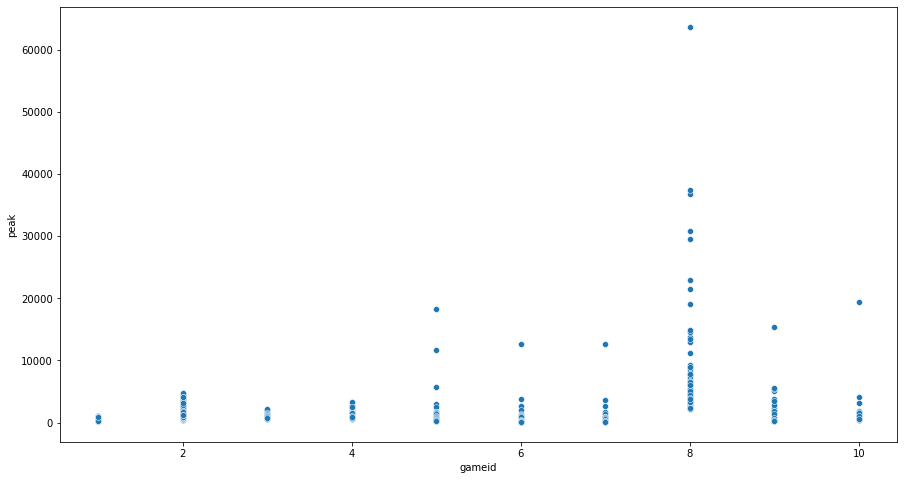

In [27]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.scatterplot(x = 'date', y='peak', data = df_csgo_sorted)

<AxesSubplot:xlabel='month', ylabel='avg_peak_perc'>

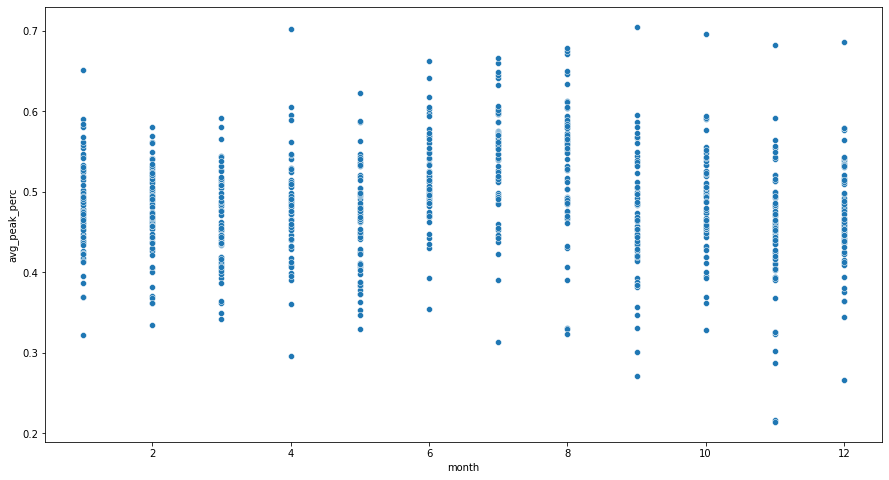

In [28]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.scatterplot(x = 'month', y = 'avg_peak_perc', data = df_csgo_sorted)

<Figure size 4320x4320 with 0 Axes>

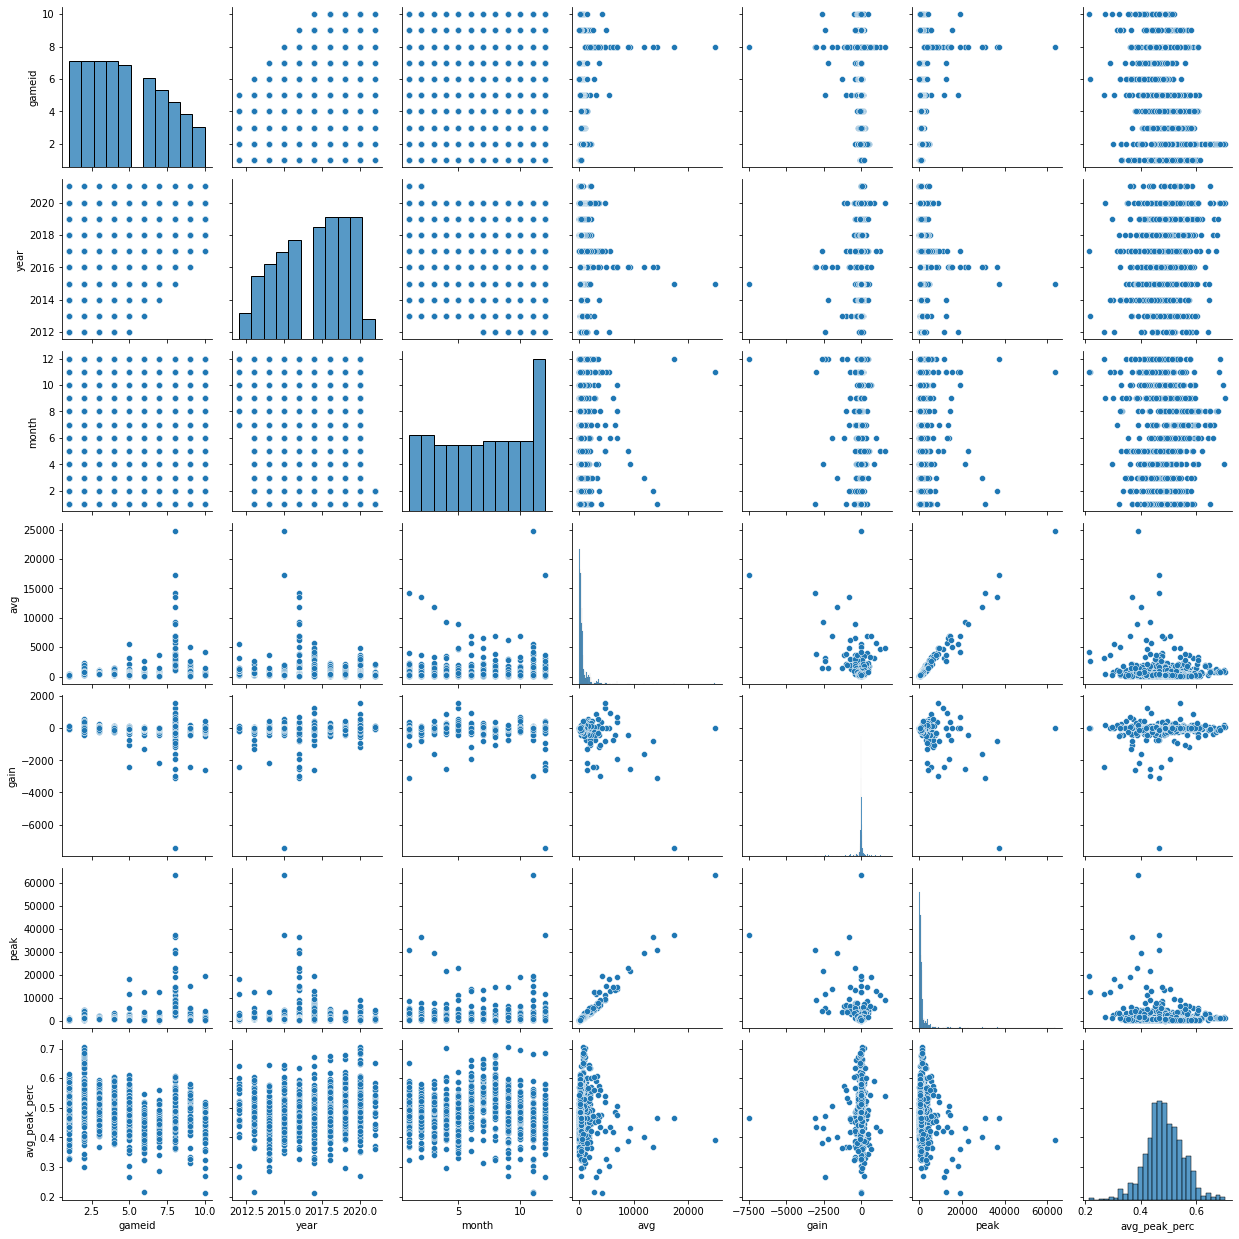

In [29]:
fig = plt.gcf()
fig.set_size_inches(60, 60)
sns.pairplot(df_csgo_sorted)

<AxesSubplot:ylabel='Frequency'>

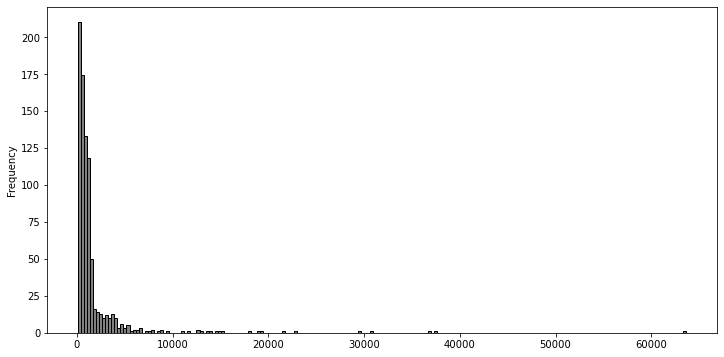

In [31]:
df_csgo['peak'].plot(kind='hist', bins=200, figsize=(12, 6), facecolor='grey', edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

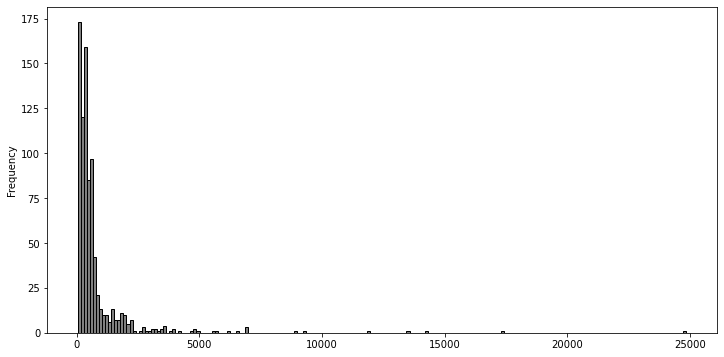

In [32]:
df_csgo['avg'].plot(kind='hist', bins=200, figsize=(12, 6), facecolor='grey', edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

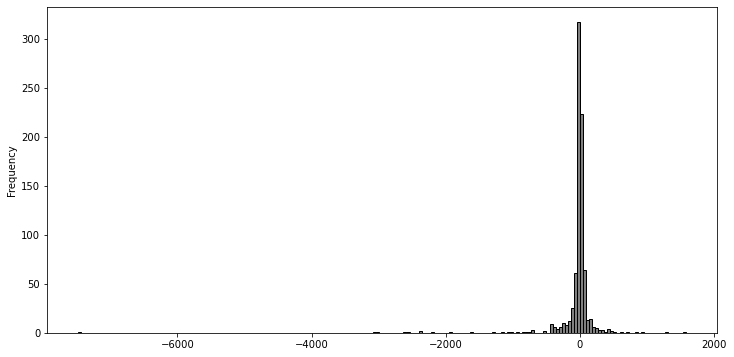

In [33]:
df_csgo['gain'].plot(kind='hist', bins=200, figsize=(12, 6), facecolor='grey', edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

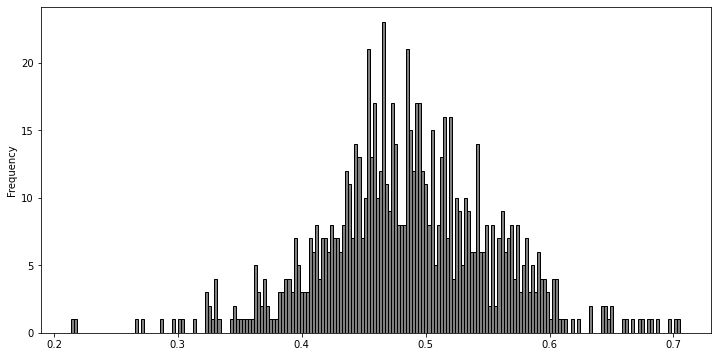

In [36]:
df_csgo['avg_peak_perc'].plot(kind='hist', bins=200, figsize=(12, 6), facecolor='grey', edgecolor='black')

<AxesSubplot:>

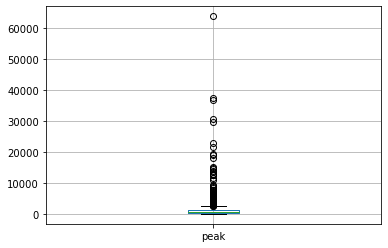

In [34]:
df_csgo.boxplot('peak')

<AxesSubplot:>

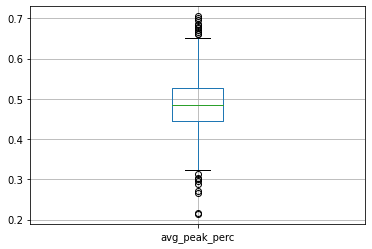

In [35]:
df_csgo.boxplot('avg_peak_perc')

### Method Chaining